**DATA ANALYSIS ON ELECTRIC VEHICLE**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#import plotly.io as pio
import bar_chart_race as bcr

**Load dataset**

In [2]:
df=pd.read_csv('D:/Data Analyst/Innomatics Intern/Electric Vehicle EDA/dataset.csv')

**EDA**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

In [4]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


In [5]:
#missing values
print(df.isnull().sum())

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                 20
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 286
DOL Vehicle ID                                         0
Vehicle Location                                      24
Electric Utility                                     443
2020 Census Tract                                      0
dtype: int64


In [6]:
# Fill missing values in 'Model', 'Vehicle Location', 'Electric Utility' (categorical) with 'N/A'
df['Model'].fillna('N/A', inplace=True)
df['Vehicle Location'].fillna('N/A', inplace=True)
df['Electric Utility'].fillna('N/A', inplace=True)

# Fill missing values in 'Legislative District' (numeric) with 0
df['Legislative District'].fillna(0, inplace=True)

print(df.isnull().sum())

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64


C:\Users\DELL\AppData\Local\Temp\ipykernel_7092\2377960492.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Model'].fillna('N/A', inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_7092\2377960492.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when do

In [7]:
print(df.shape)

(112634, 17)


In [8]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,112634.000000,112634.000000,112634.000000,112634.000000,112634.000000,1.126340e+05,1.126340e+05
mean,98156.226850,2019.003365,87.812987,1793.439681,29.729922,1.994567e+08,5.296650e+10
std,2648.733064,2.892364,102.334216,10783.753486,14.758297,9.398427e+07,1.699104e+09
min,1730.000000,1997.000000,0.000000,0.000000,0.000000,4.777000e+03,1.101001e+09
25%,98052.000000,2017.000000,0.000000,0.000000,18.000000,1.484142e+08,5.303301e+10
50%,98119.000000,2020.000000,32.000000,0.000000,34.000000,1.923896e+08,5.303303e+10
75%,98370.000000,2022.000000,208.000000,0.000000,43.000000,2.191899e+08,5.305307e+10
max,99701.000000,2023.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


**Univariate Analysis**

For Numerical Columns

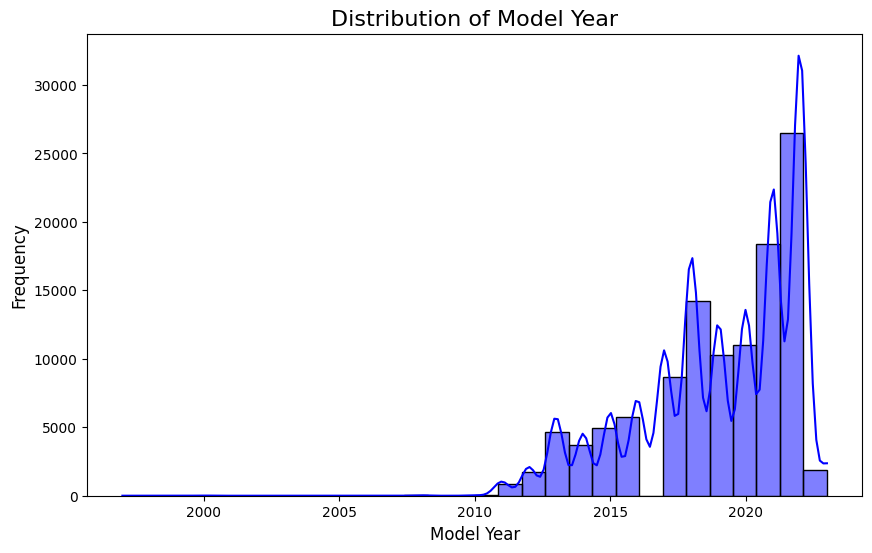

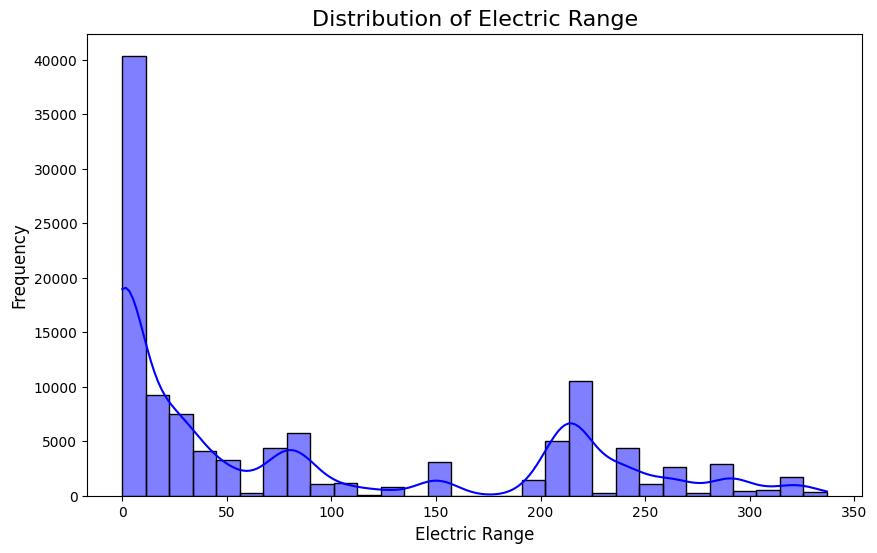

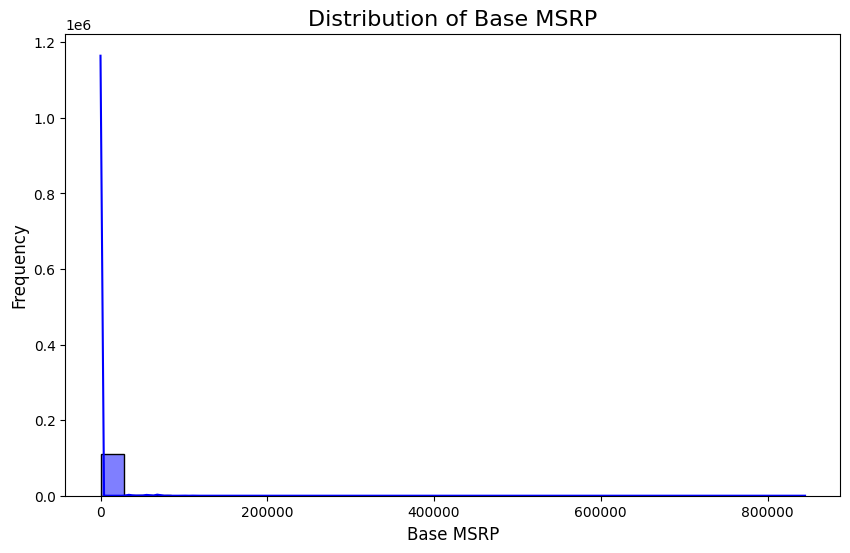

In [9]:
numeric_columns = ['Model Year', 'Electric Range', 'Base MSRP']

for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    
    # histogram with PDF (KDE)
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    
    plt.title(f'Distribution of {col}', fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    
    plt.show()

For Categorical Columns

C:\Users\DELL\AppData\Local\Temp\ipykernel_7092\2971099270.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='Set2', order=df[col].value_counts().index)


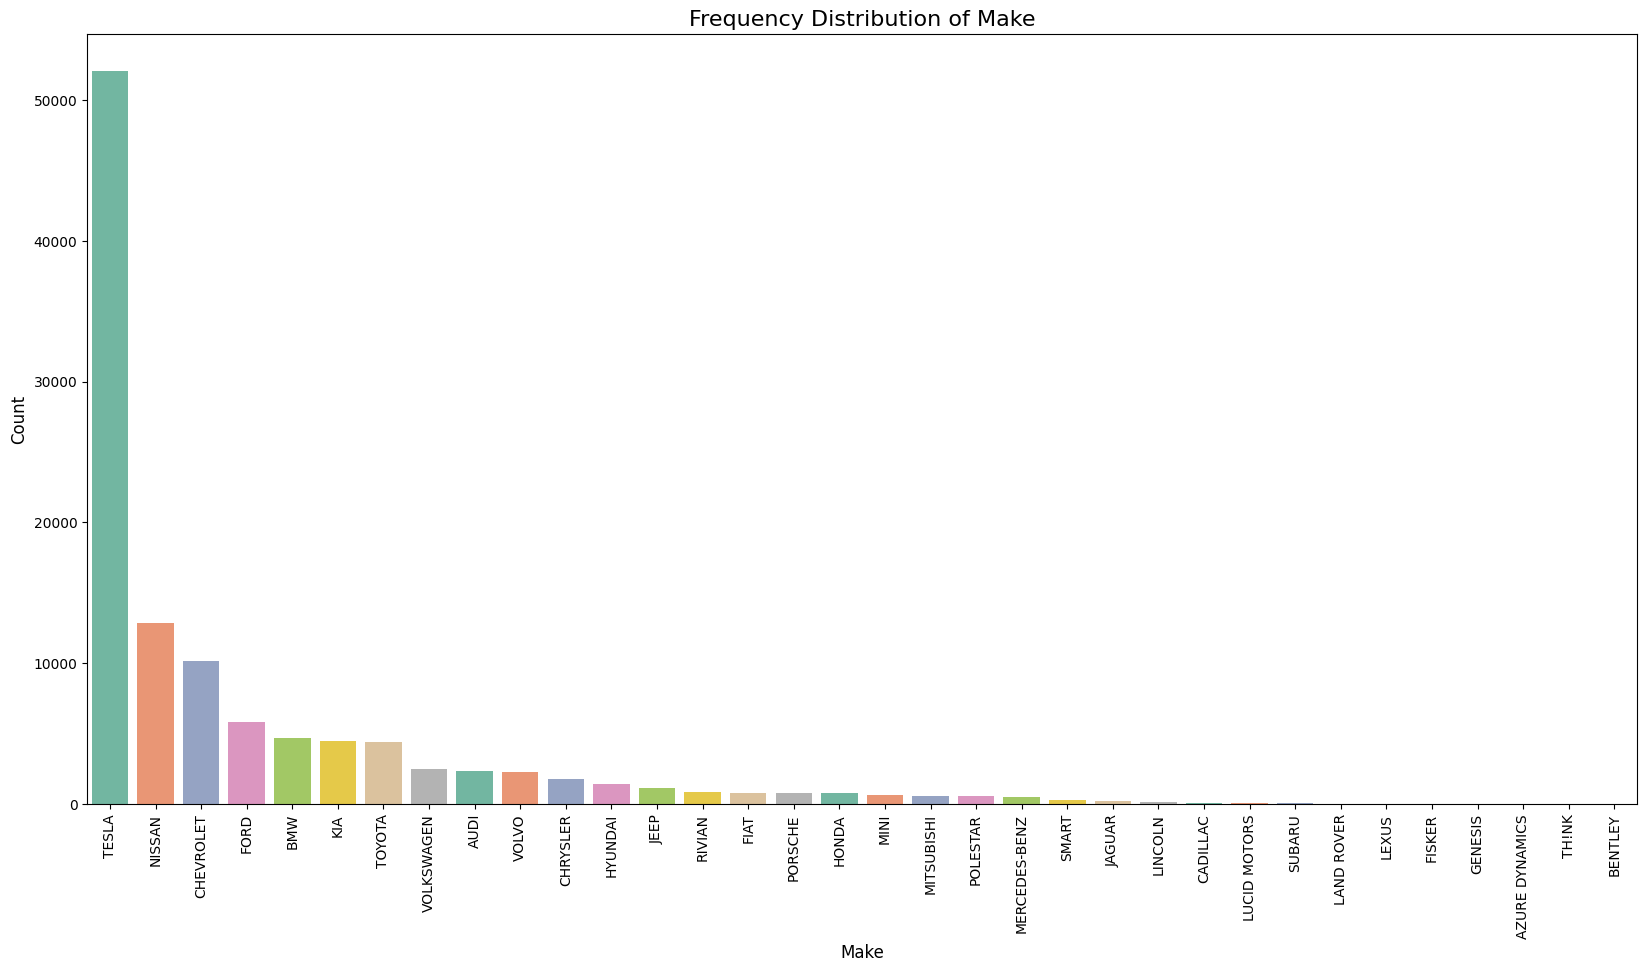

C:\Users\DELL\AppData\Local\Temp\ipykernel_7092\2971099270.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='Set2', order=df[col].value_counts().index)


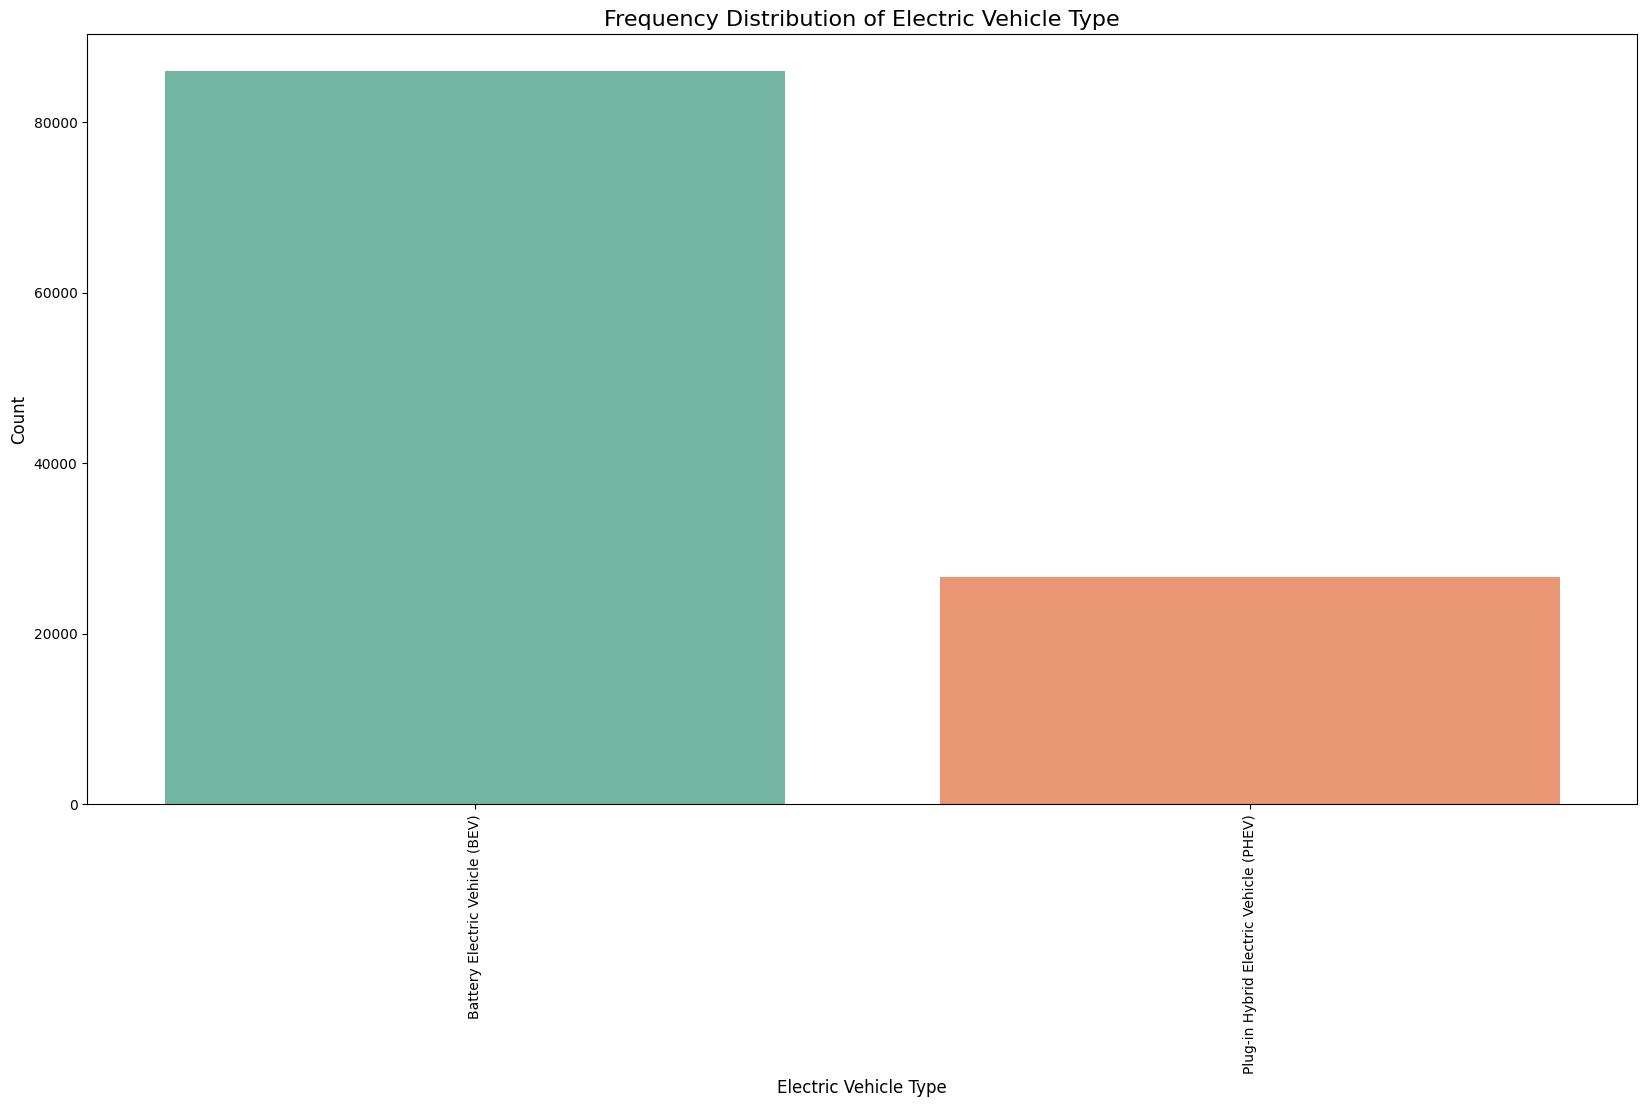

C:\Users\DELL\AppData\Local\Temp\ipykernel_7092\2971099270.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='Set2', order=df[col].value_counts().index)


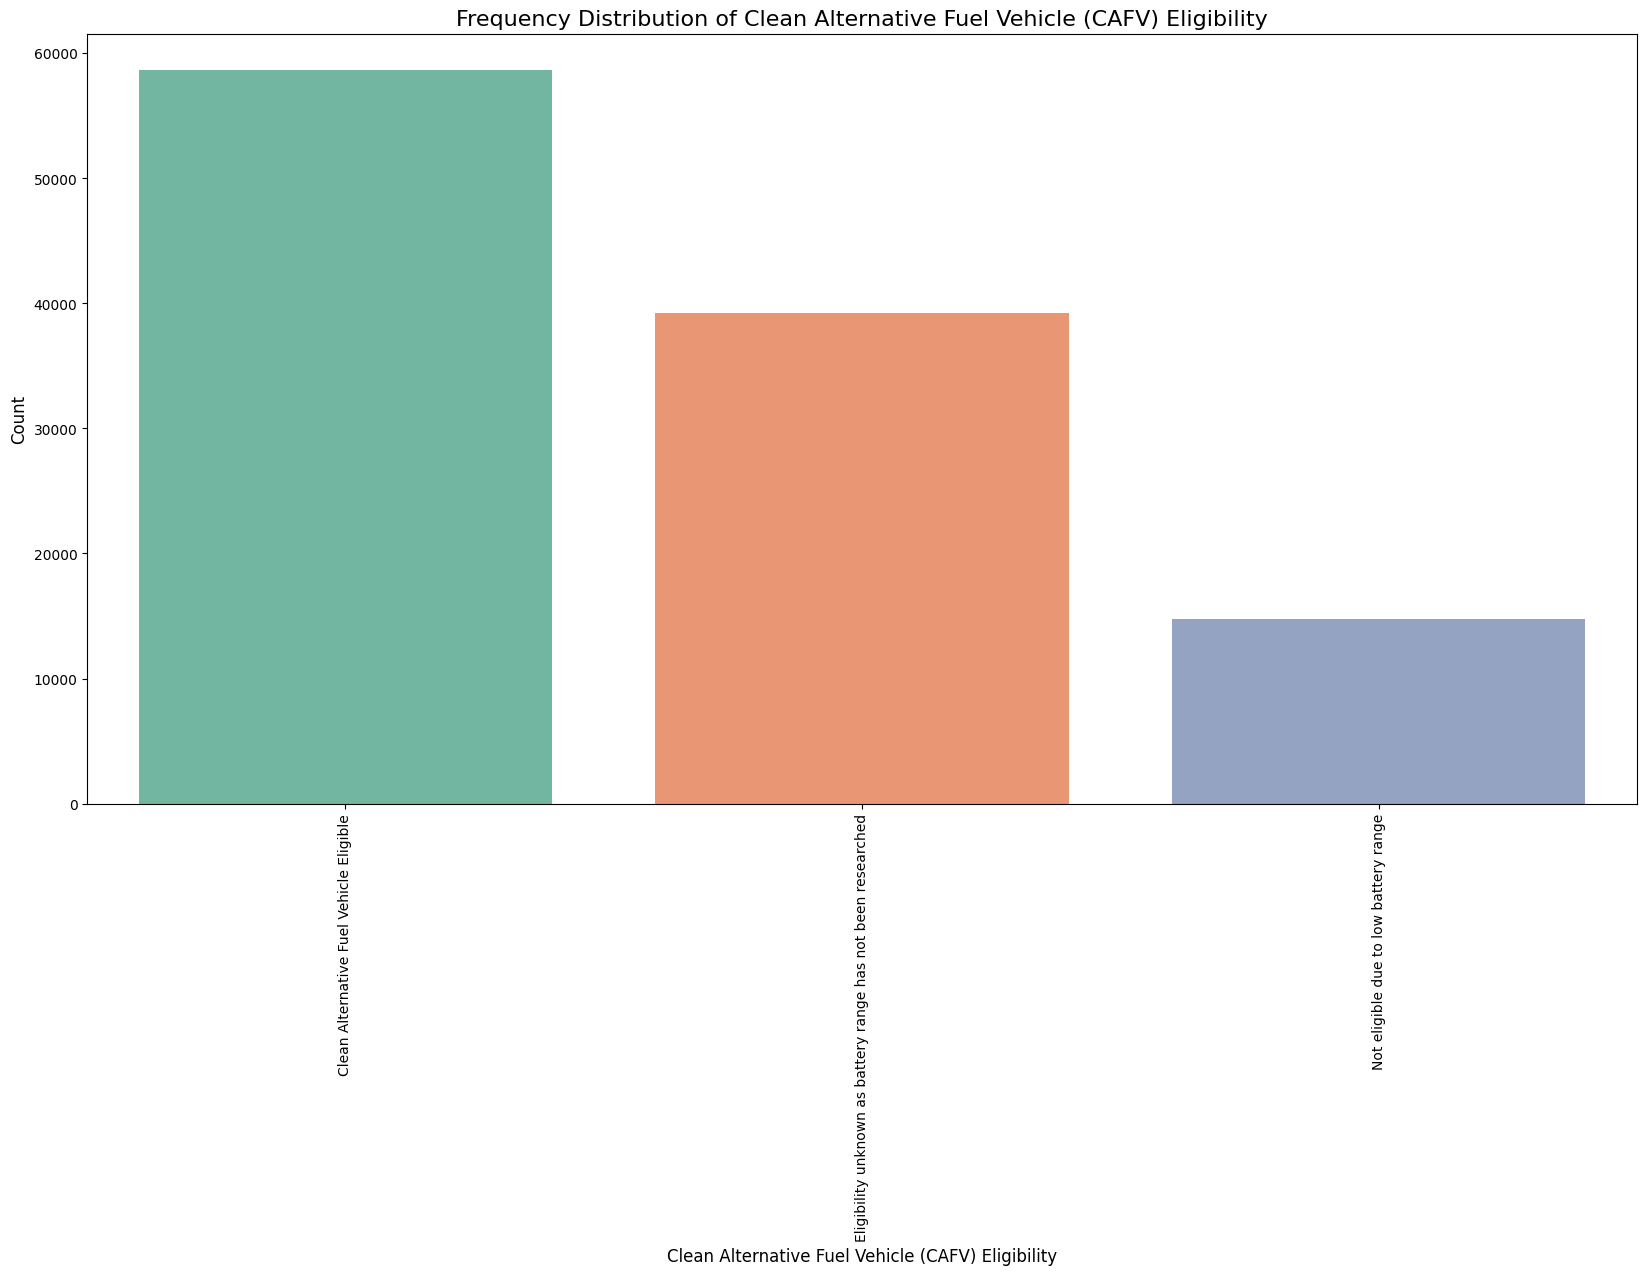

In [10]:
cat_columns = ['Make', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility']

for col in cat_columns:
    plt.figure(figsize=(20, 10))
    
    sns.countplot(x=df[col], palette='Set2', order=df[col].value_counts().index)
    
    plt.title(f'Frequency Distribution of {col}', fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    
    plt.xticks(rotation=90)
    
    plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_7092\3456939918.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='County', data=df[df['County'].isin(top_10)], palette='Set2')


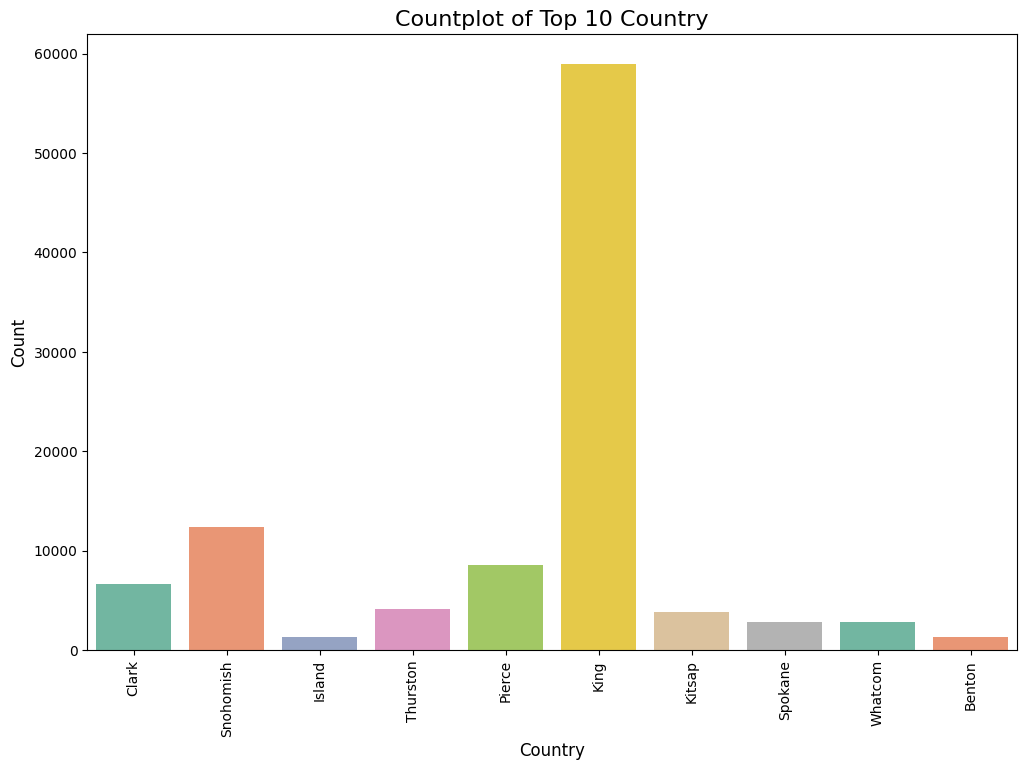

In [11]:
top_10 = df['County'].value_counts().head(10).index

plt.figure(figsize=(12, 8))

sns.countplot(x='County', data=df[df['County'].isin(top_10)], palette='Set2')

plt.xticks(rotation=90)

plt.title('Countplot of Top 10 Country', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_7092\1290303262.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Electric Utility', data=df[df['Electric Utility'].isin(top_10)], palette='Set2')


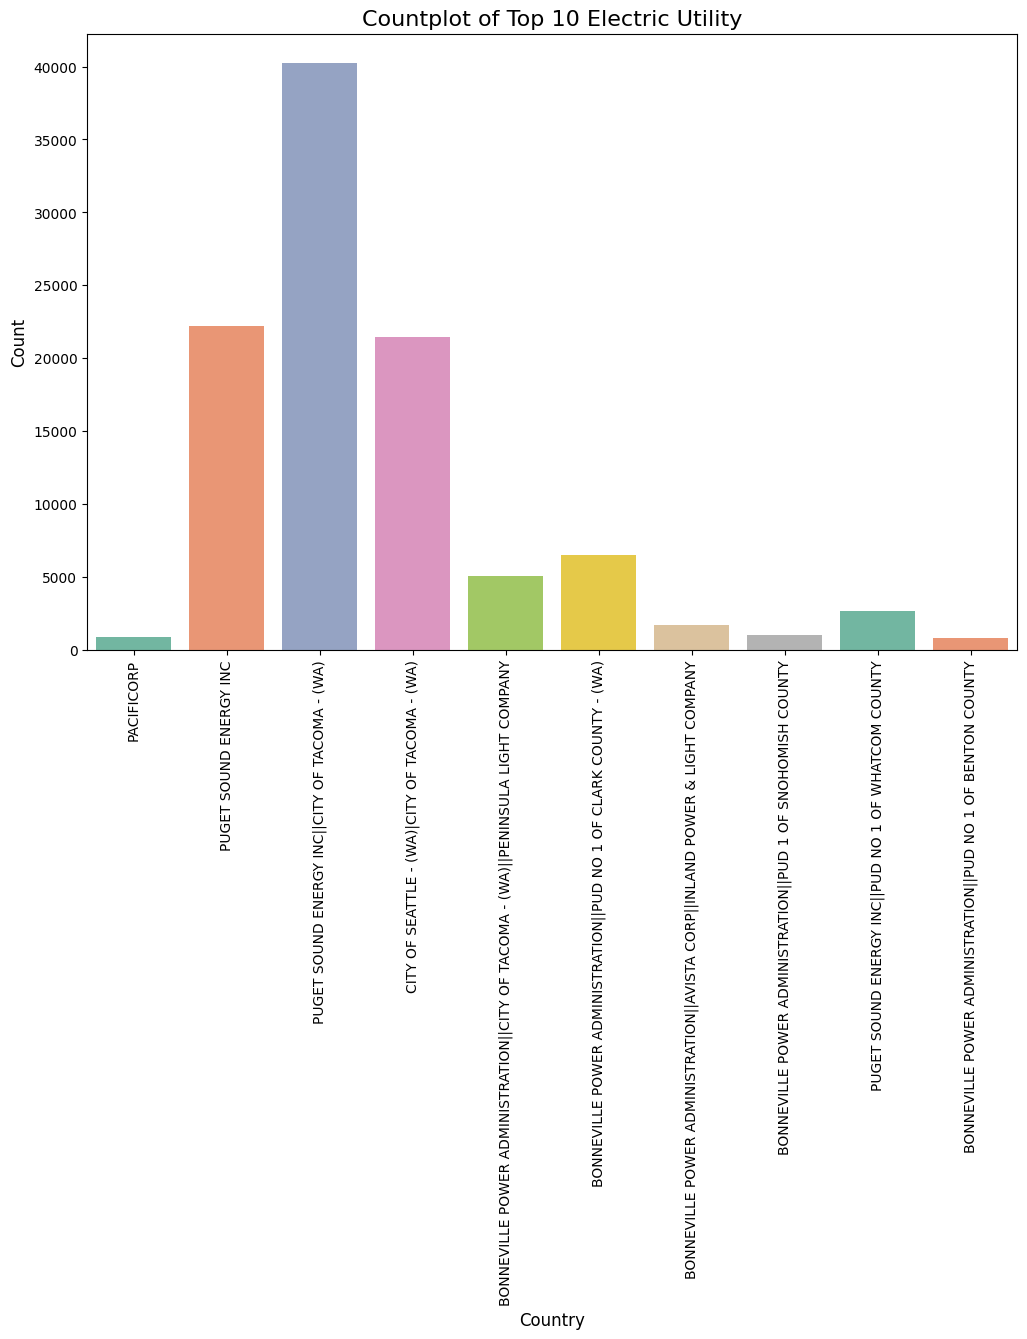

In [12]:
top_10 = df['Electric Utility'].value_counts().head(10).index

plt.figure(figsize=(12, 8))

sns.countplot(x='Electric Utility', data=df[df['Electric Utility'].isin(top_10)], palette='Set2')

plt.xticks(rotation=90)

plt.title('Countplot of Top 10 Electric Utility', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

**Bivariate Analysis**

Electric Range vs Base MSRP

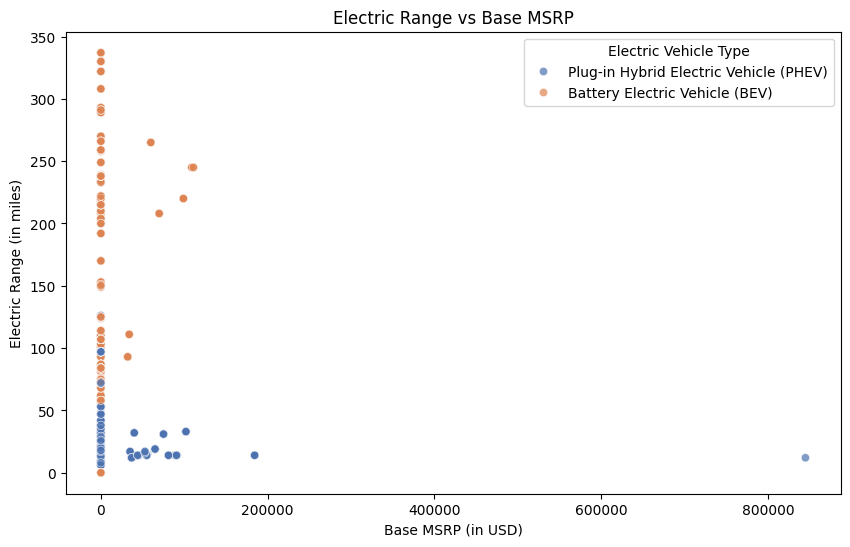

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Base MSRP', y='Electric Range', hue='Electric Vehicle Type', palette='deep', alpha=0.7)
plt.title('Electric Range vs Base MSRP')
plt.xlabel('Base MSRP (in USD)')
plt.ylabel('Electric Range (in miles)')
plt.legend(title='Electric Vehicle Type')
plt.show()

Make vs Electric Range

C:\Users\DELL\AppData\Local\Temp\ipykernel_7092\3917629786.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Make', y='Electric Range', palette='coolwarm')


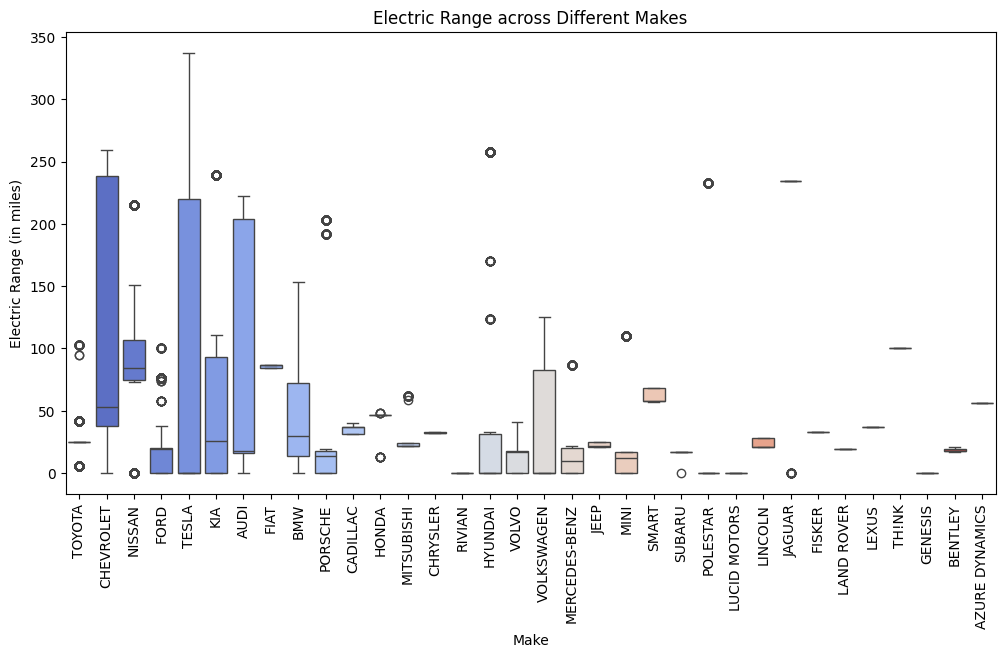

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Make', y='Electric Range', palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Electric Range across Different Makes')
plt.xlabel('Make')
plt.ylabel('Electric Range (in miles)')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_7092\3006224406.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Make', y='Electric Range', palette='Set2')


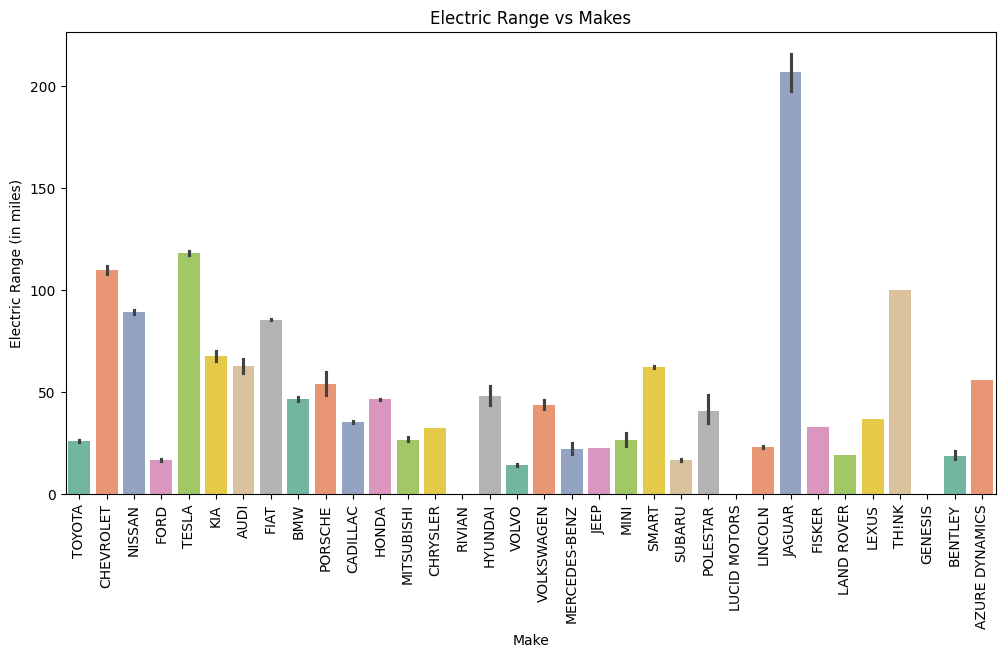

In [15]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Make', y='Electric Range', palette='Set2')
plt.xticks(rotation=90)
plt.title('Electric Range vs Makes')
plt.xlabel('Make')
plt.ylabel('Electric Range (in miles)')
plt.show()

In [16]:
# plt.figure(figsize=(10, 6))
# sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
# plt.title('Correlation Heatmap')
# plt.show()

**Create a Choropleth using plotly.express to display the number of EV vehicles based on location.**

In [17]:
#pio.renderers.default = 'notebook' 
state_ev = df.groupby('State').size().reset_index(name='EV Count')

# choropleth map using Plotly Express
fig = px.choropleth(
    state_ev,
    locations='State',  
    locationmode="USA-states",  
    color='EV Count',  
    scope="usa",  
    color_continuous_scale="Blues",  
    title='Number of Electric Vehicles (EVs) by State'
)

fig.show()

**Create a Racing Bar Plot to display the animation of EV Make and its count each year.**

In [29]:

ev_counts = df.groupby(['Make', 'Model Year']).size().reset_index(name='Count')

# Pivot df to have years as columns and counts as values
pivot_df = ev_counts.pivot_table(index='Make', columns='Model Year', values='Count', fill_value=0)

# racing bar plot
bcr.bar_chart_race(
    df=pivot_df,
    filename='ev_racing_bar_plot.mp4',  
    title='Racing Bar Plot of Electric Vehicle Makes Over Years',
    n_bars=5,  
    sort='desc',  
    steps_per_period=20,  
    period_length=1500,
    figsize=(6,3)
)

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\bar_chart_race\_make_chart.py:889: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\bar_chart_race\_make_chart.py:286: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\bar_chart_race\_make_chart.py:287: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

